In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

# 加载数据

In [2]:
os.chdir(r'D:\\文件\\kaggle案例\\源码\\Kaggle第二课代码\\第二课-20161225T092449Z\\第二课\\house price\\input')

In [3]:
df_train = pd.read_csv(r'../input/train.csv',index_col=0)

df_test = pd.read_csv(r'../input/test.csv',index_col=0)

In [4]:
df_train_Backup = df_train
df_test_Backup = df_test

In [5]:
df_train.shape,df_test.shape

((1460, 80), (1459, 79))

In [6]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


+ train先分列出要预测的指标

In [8]:
Y_train = df_train.pop('SalePrice')

In [9]:
Y_train_Backup = Y_train

+ 合并train和test做清洗

In [10]:
data_cleaning = pd.concat([df_train,df_test])


In [11]:
data_cleaning.shape

(2919, 79)

In [12]:
data_cleaning.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
data_cleaning[ 'FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [14]:
data_cleaning_Backup = data_cleaning.copy()

In [15]:
data_cleaning_Backup.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# data cleaning

In [16]:
data_cleaning.shape[0]*0.7

2043.3

+ 缺失值处理

In [17]:
col_drop = data_cleaning.isnull().sum().sort_values(ascending=False)[data_cleaning.isnull().sum().sort_values(ascending=False).values > data_cleaning.shape[0]*0.3].index

In [18]:
col_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [19]:
data_cleaning.drop(col_drop,axis=1,inplace=True)

In [20]:
data_cleaning.shape

(2919, 74)

In [21]:
data_cleaning

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,0,700,10,2009,WD,Normal
7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,0,8,2007,WD,Normal
8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,0,350,11,2009,WD,Normal
9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,0,4,2008,WD,Abnorml


In [22]:
data_cleaning.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtUnfSF          1
SaleType           1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
Electrical         1
TotalBsmtSF        1
GarageCars         1
KitchenQual        1
GarageArea         1
OverallCond        0
                ... 
YearBuilt          0
HouseStyle         0
BldgType           0
SaleCondition      0
ExterCond          0
Foundation         0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
Fireplaces   

In [23]:
col_mean = data_cleaning.mean()
data_cleaning = data_cleaning.fillna(col_mean)


In [24]:
data_cleaning.isnull().sum().sort_values(ascending=False)

GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
Exterior2nd        1
Neighborhood       0
LotFrontage        0
LotArea            0
Street             0
Foundation         0
ExterCond          0
ExterQual          0
MasVnrArea         0
LotShape           0
RoofStyle          0
RoofMatl           0
LandSlope          0
                ... 
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GarageCars         0
GarageYrBlt        0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr 

# 特征工程

### 变量转化

+ 变量的离散化,变成string

In [25]:
data_cleaning['LotFrontage'][2019]

75.0

In [26]:
data_cleaning["MSSubClass"] = data_cleaning["MSSubClass"].astype('object')

+ category热编码，pandas自带*get_dummies*，并且自动选取category

In [27]:
data_dummry = pd.get_dummies(data_cleaning)

In [28]:
data_dummry.shape

(2919, 285)

In [29]:
data_dummry.isnull().any()

LotFrontage              False
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrArea               False
BsmtFinSF1               False
BsmtFinSF2               False
BsmtUnfSF                False
TotalBsmtSF              False
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath             False
BsmtHalfBath             False
FullBath                 False
HalfBath                 False
BedroomAbvGr             False
KitchenAbvGr             False
TotRmsAbvGrd             False
Fireplaces               False
GarageYrBlt              False
GarageCars               False
GarageArea               False
WoodDeckSF               False
OpenPorchSF              False
EnclosedPorch            False
3SsnPorch                False
                         ...  
GarageFinish_RFn         False
GarageFi

In [30]:
data_dummry.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


+ 标准化numerical数据,热编码过后的数据类型也是数值型，所以这里要用dummry之前的dataclean

In [31]:

columns_standard = data_cleaning.columns[data_cleaning.dtypes != 'object']    #这里不能直接用布尔索引,要用loc，要用columns

In [32]:
columns_standard.shape

(35,)

In [33]:
data_cleaning[columns_standard]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.000000,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,80.000000,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,68.000000,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,60.000000,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,84.000000,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
6,85.000000,14115,5,5,1993,1995,0.0,732.0,0.0,64.0,...,480.0,40,30,0,320,0,0,700,10,2009
7,75.000000,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,...,636.0,255,57,0,0,0,0,0,8,2007
8,69.305795,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,...,484.0,235,204,228,0,0,0,350,11,2009
9,51.000000,6120,7,5,1931,1950,0.0,0.0,0.0,952.0,...,468.0,90,0,205,0,0,0,0,4,2008


In [34]:
columns_standard_array = np.array(data_cleaning[columns_standard])

In [35]:
data_dummry[columns_standard] = (data_dummry[columns_standard] - data_dummry[columns_standard].mean())/data_dummry[columns_standard].std()

In [36]:
data_dummry.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,-0.934702,...,0,0,0,1,0,0,0,0,1,0
2,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,-0.629788,...,0,0,0,1,0,0,0,0,1,0
3,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,-0.288467,...,0,0,0,1,0,0,0,0,1,0
4,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,-0.047266,...,0,0,0,1,1,0,0,0,0,0
5,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,...,0,0,0,1,0,0,0,0,1,0


+ 预测值的正态化，这里用log1p效果最好,平滑化数据

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C6FAB38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C6AE5C0>]], dtype=object)

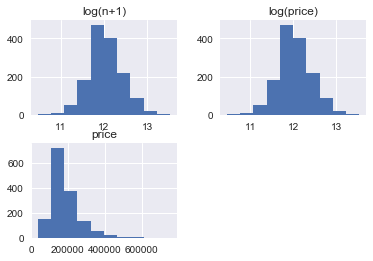

In [37]:
%matplotlib inline
hist_Y_train = pd.DataFrame({'price':Y_train,'log(price)':np.log(Y_train),'log(n+1)':np.log1p(Y_train)})
hist_Y_train.hist()

In [38]:
Y_train = np.log1p(Y_train)
Y_train.shape

(1460,)

In [39]:
data_dummry.shape

(2919, 285)

# 建立模型

+ 分为测试集和 训练集

In [40]:
data_train = data_dummry.loc[df_train.index,:]
data_test = data_dummry.loc[df_test.index,:]

In [41]:
X_train = data_train.values
X_test = data_test.values

In [42]:
X_test

array([[ 0.5017845 ,  0.18433962, -0.77242013, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54870567,  0.51970176, -0.06317371, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.22025754,  0.46429411, -0.77242013, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 4.25547741,  1.24659445, -0.77242013, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3427964 ,  0.03459947, -0.77242013, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.22025754, -0.06860838,  0.6460727 , ...,  0.        ,
         1.        ,  0.        ]])

In [43]:
y_train = Y_train.values

In [44]:
X_train.shape,y_train.shape


((1460, 285), (1460,))

In [45]:
alphas = np.logspace(-3,2,50)
alphas

array([  1.00000000e-03,   1.26485522e-03,   1.59985872e-03,
         2.02358965e-03,   2.55954792e-03,   3.23745754e-03,
         4.09491506e-03,   5.17947468e-03,   6.55128557e-03,
         8.28642773e-03,   1.04811313e-02,   1.32571137e-02,
         1.67683294e-02,   2.12095089e-02,   2.68269580e-02,
         3.39322177e-02,   4.29193426e-02,   5.42867544e-02,
         6.86648845e-02,   8.68511374e-02,   1.09854114e-01,
         1.38949549e-01,   1.75751062e-01,   2.22299648e-01,
         2.81176870e-01,   3.55648031e-01,   4.49843267e-01,
         5.68986603e-01,   7.19685673e-01,   9.10298178e-01,
         1.15139540e+00,   1.45634848e+00,   1.84206997e+00,
         2.32995181e+00,   2.94705170e+00,   3.72759372e+00,
         4.71486636e+00,   5.96362332e+00,   7.54312006e+00,
         9.54095476e+00,   1.20679264e+01,   1.52641797e+01,
         1.93069773e+01,   2.44205309e+01,   3.08884360e+01,
         3.90693994e+01,   4.94171336e+01,   6.25055193e+01,
         7.90604321e+01,

In [46]:
from sklearn.linear_model import Ridge


In [47]:
from sklearn.model_selection import cross_val_score


In [48]:
all_loss = []
all_score=[]
for alpha in alphas:
    Ridge_reg = Ridge(alpha)
    loss = cross_val_score(Ridge_reg,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
    score = np.sqrt(-loss)
    all_score.append(score.mean())

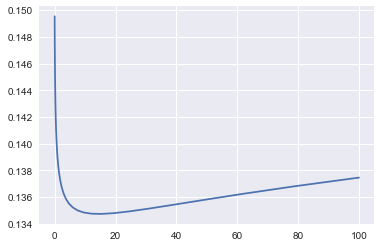

In [49]:
plt.plot(alphas,all_score)

from sklearn.ensemble import RandomForestRegressor

In [50]:
# 用randomforst试试
from sklearn.ensemble import RandomForestRegressor

In [51]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))  

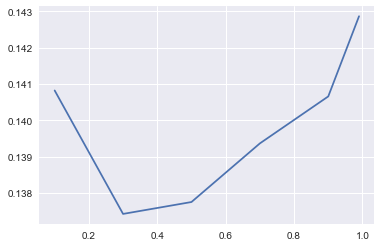

In [52]:
plt.plot(max_features,test_scores)

In [53]:
a = [1,12,3,4,4]

In [54]:
a.append(5)

In [55]:
a

[1, 12, 3, 4, 4, 5]

+ 用stack集成两个模型

In [56]:
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(max_features=0.3)

In [57]:
np.isnan(X_test)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [58]:
X_test

array([[ 0.5017845 ,  0.18433962, -0.77242013, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54870567,  0.51970176, -0.06317371, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.22025754,  0.46429411, -0.77242013, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 4.25547741,  1.24659445, -0.77242013, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3427964 ,  0.03459947, -0.77242013, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.22025754, -0.06860838,  0.6460727 , ...,  0.        ,
         1.        ,  0.        ]])

In [59]:
ridge.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
y1 = ridge.predict(X_test)
y2 = rf.predict(X_test)
y_predict = (y1+y2)/2

# 高级的ensemble

alpha=15的ridge效果最好

In [61]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=15)

In [62]:
from sklearn.model_selection import cross_val_score
score = np.sqrt(-cross_val_score(ridge,X_train,y_train,cv=10,scoring='neg_mean_squared_error')).mean()
score

0.13474116693040633

## 先用bagging

In [63]:
from sklearn.ensemble import BaggingRegressor
rgs_test = BaggingRegressor()
rgs_test.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [64]:
params = [1,10,20,30,40,50,60,70,80]
scores = []
for param in params:
    rgs = BaggingRegressor(n_estimators=param,base_estimator=ridge)
    score = np.mean(np.sqrt(-cross_val_score(rgs,X_train,y_train,cv=10,scoring='neg_mean_squared_error')))
    scores.append(score)

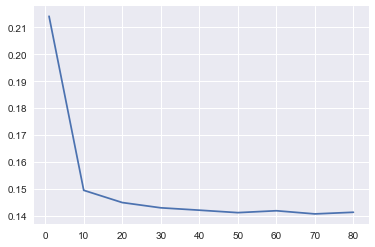

In [69]:
plt.plot(params,scores)
plt.show()

In [70]:
# 用decision_tree试试
params = [1,10,20,30,40,50,60,70,80]
scores = []
for param in params:
    rgs = BaggingRegressor(n_estimators=param)
    score = np.mean(np.sqrt(-cross_val_score(rgs,X_train,y_train,cv=10,scoring='neg_mean_squared_error')))
    scores.append(score)

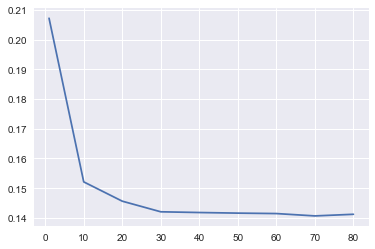

In [71]:
plt.plot(params,scores)
plt.show()

# boosting

+ 这里先用adaboost

In [74]:
from sklearn.ensemble import AdaBoostRegressor

In [77]:
params = [10,20,30,40,50,60,70,80]
scores = []
for param in params:
    rgs = AdaBoostRegressor(n_estimators=param)
    score = np.mean(np.sqrt(-cross_val_score(rgs,X_train,y_train,cv=6,scoring='neg_mean_squared_error')))
    scores.append(score)

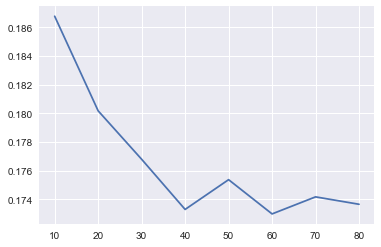

In [78]:
plt.plot(params,scores)
plt.show()

+ 用xgboost

In [79]:
from xgboost import XGBRegressor

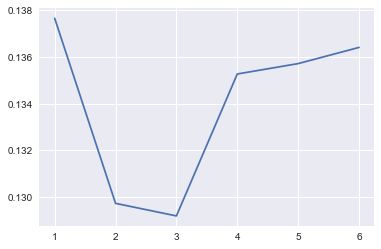

In [81]:
params = [1,2,3,4,5,6]
scores = []
for param in params:
    rgs = XGBRegressor(max_depth=param)
    score = np.mean(np.sqrt(-cross_val_score(rgs,X_train,y_train,cv=6,scoring='neg_mean_squared_error')))
    scores.append(score)
plt.plot(params,scores)
plt.show()    